In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sew_df = pd.read_csv('metrics/sew_mixed_metrics.csv')
games_df = pd.read_csv('metrics/games_mixed_metrics.csv')
music_df = pd.read_csv('metrics/music_test_metrics.csv')

music_df

,domain,trial_type,add_data,correctly_predicted,incorrectly_predicted,total_predicted_positives,ground_truth_positives,TP,TN,FP,FN,accuracy,precision,recall,f1
0,music,ba,0,9377,623,5954,5945,5638,3739,316,307,93.77,0.937679,0.9377,0.937689


In [4]:
''' Possible metrics:   'correctly_predicted',
                       'incorrectly_predicted', 'total_predicted_positives',
                       'ground_truth_positives', 'TP', 'TN', 'FP', 'FN', 'accuracy',
                       'precision', 'recall', 'f1' '''

met = 'f1'
y_lim_h = 1 #set this to the max possible for the selected metric
y_lim_l = 0

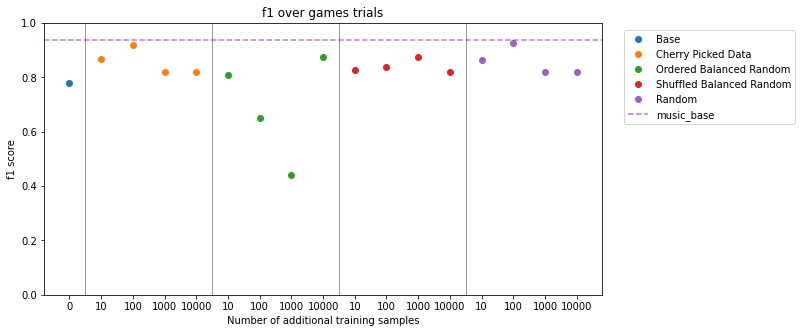

In [5]:
types = ['ba', 'cp','re','es', 'ra']
t_dict = {'ba': 'Base', 'cp': 'Cherry Picked Data', 're': 'Ordered Balanced Random', 'ra': 'Random', 'es': 'Shuffled Balanced Random'}

fig, axes = plt.subplots(figsize=(10,5)) 

for t in types:
    tmp = games_df[games_df['trial_type']==t]

    plt.plot(tmp[met], 'o', label=t_dict[t]);
    
axes.set_xticks(ticks=[x for x in range(17)])
axes.set_xticklabels(labels=[0] + [10, 100, 1000, 10000]*4)
plt.axvline(color='grey',x=0.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=4.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=8.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=12.5, alpha=0.8, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('Number of additional training samples')
plt.ylim(y_lim_l,y_lim_h)
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.5)
plt.legend(loc='right', bbox_to_anchor=(1.355, 0.8))
plt.title(f'{met} over games trials');
plt.savefig(f'figures/games_{met}_over_trials.png', bbox_inches="tight");

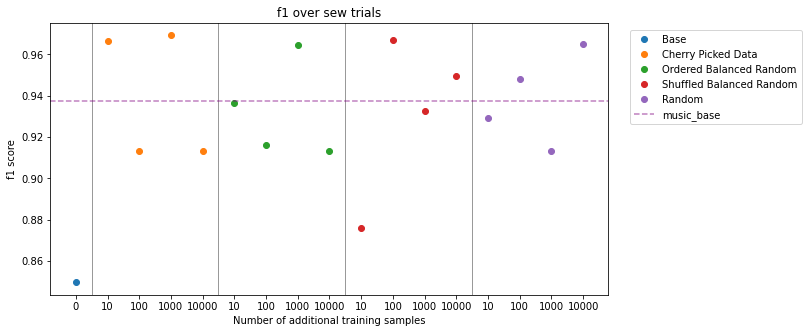

In [6]:
fig, axes = plt.subplots(figsize=(10,5))
for t in types:
    tmp = sew_df[sew_df['trial_type']==t]

    plt.plot(tmp[met], 'o', label=t_dict[t]);
    
axes.set_xticks(ticks=[x for x in range(17)])
axes.set_xticklabels(labels=[0] + [10, 100, 1000, 10000]*4)
plt.axvline(color='grey',x=0.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=4.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=8.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=12.5, alpha=0.8, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('Number of additional training samples')
#plt.ylim(y_lim_l,y_lim_h)
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.5)
plt.legend(loc='right', bbox_to_anchor=(1.355, 0.8))
plt.title(f'{met} over sew trials');
plt.savefig(f'figures/sew_{met}_over_trials.png', bbox_inches="tight");

In [7]:
g_short1 = games_df[games_df['trial_type']=='ra'].reset_index(drop=True)
g_short2 = games_df[games_df['trial_type']=='cp'].reset_index(drop=True)
s_short1 = sew_df[sew_df['trial_type']=='ra'].reset_index(drop=True)
s_short2 = sew_df[sew_df['trial_type']=='cp'].reset_index(drop=True)

In [8]:
games_df[games_df['trial_type']=='ba'][met]

0    0.777863
Name: f1, dtype: float64

In [140]:
g_short1

,domain,trial_type,add_data,correctly_predicted,incorrectly_predicted,total_predicted_positives,ground_truth_positives,TP,TN,FP,FN,accuracy,precision,recall,f1
0,games,ra,10,8398,1602,7303,8773,7237,1161,66,1536,83.98,0.922191,0.8398,0.862482
1,games,ra,100,9300,700,9117,8773,8595,705,522,178,93.00,0.925035,0.9300,0.924967
2,games,ra,1000,8770,1230,9997,8773,8770,0,1227,3,87.70,0.769623,0.8770,0.819810
3,games,ra,10000,8773,1227,10000,8773,8773,0,1227,0,87.73,0.769655,0.8773,0.819960


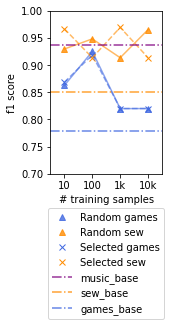

In [51]:
fig, axes = plt.subplots(figsize=(2,3)) 

plt.plot(g_short1[met], '^', label='Random games', color='royalblue', alpha=0.8)
plt.plot(s_short1[met], '^', label='Random sew', color='darkorange', alpha=0.8)
plt.plot(g_short2[met], 'x', label='Selected games', color='royalblue', alpha=1)
plt.plot(s_short2[met], 'x', label='Selected sew', color='darkorange', alpha=1)

plt.plot(g_short1[met], color='royalblue', alpha=0.6)
plt.plot(s_short1[met], color='darkorange', alpha=0.6)
plt.plot(g_short2[met], '--',  color='royalblue', alpha=0.6)
plt.plot(s_short2[met],  '--', color='darkorange', alpha=0.6)

    
axes.set_xticks(ticks=[x for x in range(4)])
axes.set_xticklabels(labels=[10, 100, '1k', '10k'])

#plt.axvline(color='grey',x=3.5, alpha=0.7, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('# training samples')
plt.ylim(0.7,1)
plt.xlim(-0.5, 3.5)
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '-.', label = 'music_base', alpha = 0.8)
plt.axhline(y = float(sew_df[sew_df['trial_type']=='ba'][met]), color = 'darkorange', linestyle = '-.', label = 'sew_base', alpha = 0.8)
plt.axhline(y = float(games_df[games_df['trial_type']=='ba'][met]), color = 'royalblue', linestyle = '-.', label = 'games_base', alpha = 0.8)

plt.legend(loc='center', bbox_to_anchor=(0.5, -0.55))
#plt.title(f'{met} over increasing samples');
plt.savefig(f'figures/cp_ra_only_{met}.png', bbox_inches="tight");

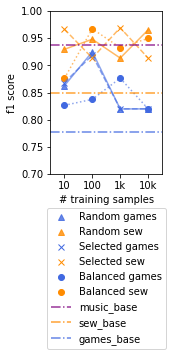

In [52]:
g_short3 = games_df[games_df['trial_type']=='es'].reset_index(drop=True)
s_short3 = sew_df[sew_df['trial_type']=='es'].reset_index(drop=True)

fig, axes = plt.subplots(figsize=(2,3)) 

plt.plot(g_short1[met], '^', label='Random games', color='royalblue', alpha=0.8)
plt.plot(s_short1[met], '^', label='Random sew', color='darkorange', alpha=0.8)

plt.plot(g_short2[met], 'x', label='Selected games', color='royalblue', alpha=1)
plt.plot(s_short2[met], 'x', label='Selected sew', color='darkorange', alpha=1)

plt.plot(g_short3[met], 'o', label='Balanced games', color='royalblue', alpha=1)
plt.plot(s_short3[met], 'o', label='Balanced sew', color='darkorange', alpha=1)



plt.plot(g_short1[met], color='royalblue', alpha=0.6)
plt.plot(s_short1[met], color='darkorange', alpha=0.6)
plt.plot(g_short2[met], '--',  color='royalblue', alpha=0.6)
plt.plot(s_short2[met],  '--', color='darkorange', alpha=0.6)
plt.plot(g_short3[met], ':',  color='royalblue', alpha=0.6)
plt.plot(s_short3[met],  ':', color='darkorange', alpha=0.6)


    
axes.set_xticks(ticks=[x for x in range(4)])
axes.set_xticklabels(labels=[10, 100, '1k', '10k'])

#plt.axvline(color='grey',x=3.5, alpha=0.7, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('# training samples')
plt.ylim(0.7,1)
plt.xlim(-0.5, 3.5)
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '-.', label = 'music_base', alpha = 0.8)
plt.axhline(y = float(sew_df[sew_df['trial_type']=='ba'][met]), color = 'darkorange', linestyle = '-.', label = 'sew_base', alpha = 0.8)
plt.axhline(y = float(games_df[games_df['trial_type']=='ba'][met]), color = 'royalblue', linestyle = '-.', label = 'games_base', alpha = 0.8)

plt.legend(loc='center', bbox_to_anchor=(0.5, -0.64))
#plt.title(f'{met} over increasing samples');
plt.savefig(f'figures/with_rand_shuffled_{met}.png', bbox_inches="tight");


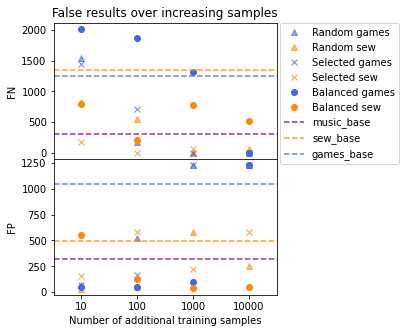

In [155]:
fig, axes = plt.subplots(2,1,figsize=(4,5), sharex=True) 

axes[0].plot(g_short1['FN'], '^', label='Random games', color='royalblue', alpha=0.6)
axes[0].plot(s_short1['FN'], '^', label='Random sew', color='darkorange', alpha=0.6)

axes[0].plot(g_short2['FN'], 'x', label='Selected games', color='royalblue', alpha=0.8)
axes[0].plot(s_short2['FN'], 'x', label='Selected sew', color='darkorange', alpha=0.8)

axes[0].plot(g_short3['FN'], 'o', label='Balanced games', color='royalblue', alpha=1)
axes[0].plot(s_short3['FN'], 'o', label='Balanced sew', color='darkorange', alpha=1)


axes[1].plot(g_short1['FP'], '^', label='Random games', color='royalblue', alpha=0.6)
axes[1].plot(s_short1['FP'], '^', label='Random sew', color='darkorange', alpha=0.6)

axes[1].plot(g_short2['FP'], 'x', label='Selected games', color='royalblue', alpha=0.8)
axes[1].plot(s_short2['FP'], 'x', label='Selected sew', color='darkorange', alpha=0.8)

axes[1].plot(g_short3['FP'], 'o', label='Balanced games', color='royalblue', alpha=1)
axes[1].plot(s_short3['FP'], 'o', label='Balanced sew', color='darkorange', alpha=1)
    
axes[1].set_xticks(ticks=[x for x in range(4)])
axes[1].set_xticklabels(labels=[10, 100, 1000, 10000])

#plt.axvline(color='grey',x=3.5, alpha=0.7, lw=1)
axes[0].set_ylabel('FN')
axes[1].set_ylabel('FP')
axes[1].set_xlabel('Number of additional training samples')
#plt.ylim(60,y_lim_h)
plt.xlim(-0.5, 3.5)
axes[0].axhline(y = float(music_df['FN']), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.8)
axes[0].axhline(y = float(sew_df[sew_df['trial_type']=='ba']['FN']), color = 'darkorange', linestyle = '--', label = 'sew_base', alpha = 0.8)
axes[0].axhline(y = float(games_df[games_df['trial_type']=='ba']['FN']), color = 'royalblue', linestyle = '--', label = 'games_base', alpha = 0.8)
axes[1].axhline(y = float(music_df['FP']), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.8)
axes[1].axhline(y = float(sew_df[sew_df['trial_type']=='ba']['FP']), color = 'darkorange', linestyle = '--', label = 'sew_base', alpha = 0.8)
axes[1].axhline(y = float(games_df[games_df['trial_type']=='ba']['FP']), color = 'royalblue', linestyle = '--', label = 'games_base', alpha = 0.8)

axes[0].legend(loc='right', bbox_to_anchor=(1.57, 0.48))
axes[0].set_title(f'False results over increasing samples')
plt.subplots_adjust(hspace=.0);
plt.savefig(f'figures/total_errors.png', bbox_inches="tight");

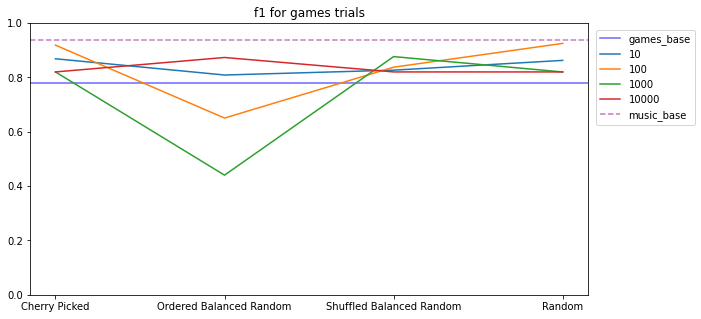

In [6]:
fig, axes = plt.subplots(figsize=(10,5))
x = True
for t in [0, 10, 100, 1000, 10000]:
    tmp = games_df[games_df['add_data']==t]
    #print(tmp['model'])
    if x:
        #plt.plot(tmp[met], '.', label='Base' )
        plt.axhline(y = float(tmp[met]), color = 'blue', linestyle = '-', label= 'games_base', alpha=0.6)
        x=False
    else:
        plt.plot(tmp['trial_type'], tmp[met], label=t)
        
axes.set_xticks(ticks=[0, 1, 2, 3])
axes.set_xticklabels(labels=['Cherry Picked','Ordered Balanced Random','Shuffled Balanced Random', 'Random'])
plt.title(f'{met} for games trials')
plt.ylim(y_lim_l,y_lim_h)
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.5)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8))
plt.savefig(f'figures/games_{met}_by_additional.png', bbox_inches="tight");

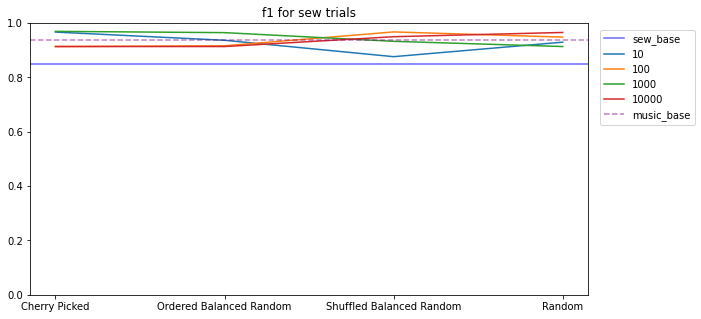

In [7]:
fig, axes = plt.subplots(figsize=(10,5))
x = True
for t in [0, 10, 100, 1000, 10000]:
    tmp = sew_df[sew_df['add_data']==t]
    #print(tmp['model'])
    if x:
        #plt.plot(tmp[met], '.', label='Base' )
        plt.axhline(y = float(tmp[met]), color = 'blue', linestyle = '-', label= 'sew_base', alpha=0.6)
        x=False
    else:
        plt.plot(tmp['trial_type'], tmp[met], label=t,)
        
axes.set_xticks(ticks=[0, 1, 2, 3])
axes.set_xticklabels(labels=['Cherry Picked','Ordered Balanced Random','Shuffled Balanced Random', 'Random'])
plt.ylim(y_lim_l,y_lim_h)
plt.title(f'{met} for sew trials')
plt.axhline(y = float(music_df[met]), color = 'purple', linestyle = '--', label = 'music_base', alpha = 0.5)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8))
plt.savefig(f'figures/sew_{met}_by_additional.png', bbox_inches="tight");